In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import PIL
# from PIL import Image
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import random
# import os

# df=pd.read_csv('fashion-mnist_train.csv')
# df.head()

# rownum=100
# if rownum>-1 and rownum<len(df):
#     pixels=df.iloc[rownum][1:].values.reshape(28,28)
#     array=np.array(pixels,dtype=np.uint8)
#     img=Image.fromarray(array)
#     img.save('1.jpg')
# else:
#     print('Row index out of bounds')

# img=plt.imread('1.jpg')
# plt.imshow(img,cmap='Greys_r')
# plt.axis('off')
# plt.show()


# #flatten 734 pixels,
# imgpath='river.jpg'
# ima=Image.open(imgpath)
# ima.show()

# img = Image.open(image_path)

# # Step 2: Define the cropping box (left, upper, right, lower)
# # Example: Crop a region starting from (100, 100) to (400, 400)
# crop_box = (100, 100, 400, 400)

# # Step 3: Crop the image using the defined box
# cropped_img = img.crop(crop_box)

# # Step 4: Display the cropped image
# plt.imshow(cropped_img)
# plt.axis('off')
# plt.show()

# Base Code for reading CSV as image (numpy array )

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ymattu/fashion-mnist-csv/refs/heads/master/fashion_train.csv')

In [ ]:

df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V776', 'V777', 'V778', 'V779', 'V780', 'V781', 'V782', 'V783', 'V784',
       'y'],
      dtype='object', length=785)

In [ ]:
df.drop(columns=['y'],inplace=True)

In [ ]:
df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0,0,0,0,0,0,0,0,0,22,...,49,0,0,1,0,0,3,0,0,0


In [ ]:

import os
os.makedirs('mnist_images')

In [ ]:
images=[]
for _,row in df.iterrows():
    img = np.reshape(np.array(row),(28,28))
    # plt.imsave(f'mnist_images/{_}.png',img)
    images.append(img)

In [ ]:
images[0].shape

(28, 28)

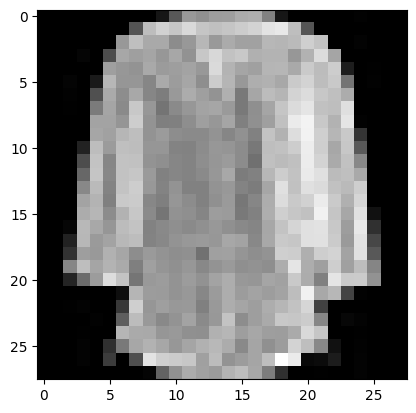

In [ ]:
plt.imshow(images[0],cmap='gray')

In [ ]:
color_img=plt.imread('col.jpg')

In [ ]:
gs_img = np.dot(color_img[...,:3], [1/3,1/3,1/3])

In [ ]:
gs_img.max()

594

 - Convert to gray scale
 - Crop an image
 - Arithmetic Operations
   - negative
   - addition
   - substraction
   - XOR
 - Logical
   - OR
   - AND
   - XOR

Cropping

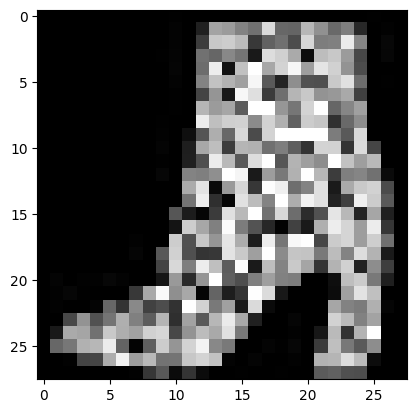

In [ ]:

plt.imshow(images[1],cmap='gray')

In [ ]:
# added_img=np.clip(np.array(img)+np.array(img1),0,255).astype(np.uint8)

# fig,axes=plt.subplots(1,3,figsize=(10,10))

# axes[0].imshow(img,cmap='gray')
# axes[0].set_title("first")
# axes[0].axis("off")

# axes[1].imshow(img1,cmap='gray')
# axes[1].set_title("first")
# axes[1].axis("off")

# axes[2].imshow(added_img,cmap='gray')
# axes[2].set_title("first")
# axes[2].axis("off")

# plt.tight_layout()
# plt.show()

# # left_shift_img = np.left_shift(np.array(img2), 1)
# #divided_img = np.clip(np.array(img) / (np.array(img2) + 1), 0, 255).astype(np.uint8)

# and_img= np.bitwise_and(np.array(img),np.array(img1))

Addition of images

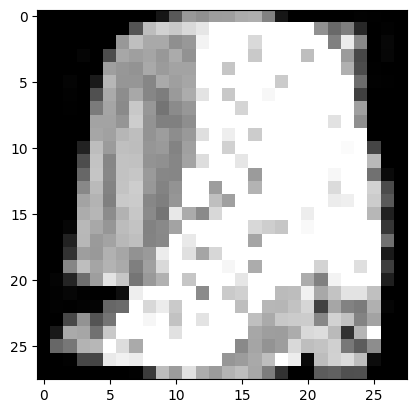

In [ ]:
def add_images(img1,img2):
  img3 = np.zeros_like(img1)
  for i in range(28):
    for j in range(28):
      img3[i,j]=min(img1[i,j]+img2[i,j],255)
  return img3

plt.imshow(add_images(images[0],images[1]),cmap='gray')

In [ ]:
bool(123)

True

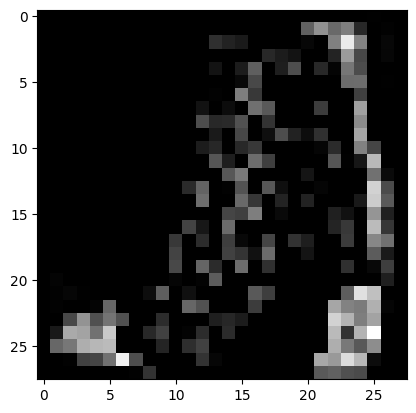

In [ ]:
def sub_images(img1,img2):
  img3 = np.zeros_like(img1)
  for i in range(28):
    for j in range(28):
      img3[i,j]=max(img1[i,j]-img2[i,j],0)

  return img3

plt.imshow(sub_images(images[1],images[0]),cmap='gray')

In [ ]:
images

In [ ]:
img1=images[0].copy()
img2=images[2].copy()
img = images[0].copy()

In [ ]:
img.max()

255

Logical Operators

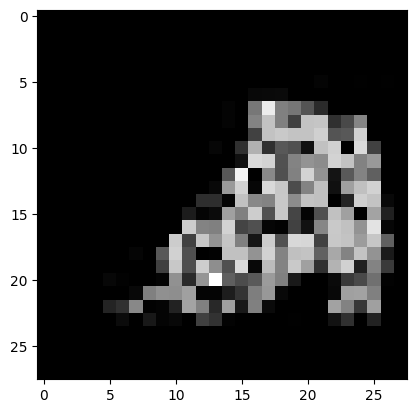

In [ ]:
def bitand(img1,img2):
  img3 = np.zeros_like(img1)
  for i in range(28):
    for j in range(28):
      img3[i,j]=img1[i,j] & img2[i,j]
  return img3

plt.imshow(bitand(img1,img2),cmap='gray')

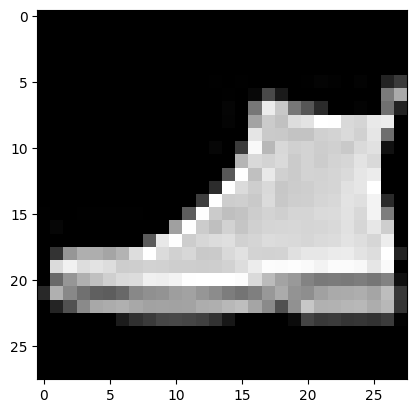

In [ ]:
plt.imshow(images[2])

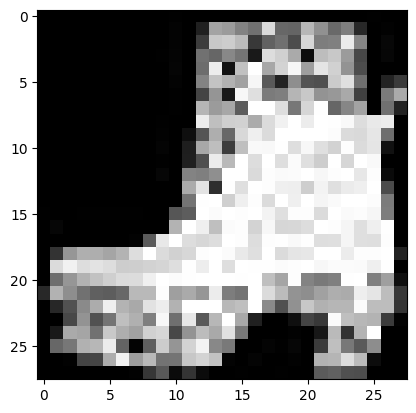

In [ ]:
def bitor(img1,img2):
  img3 = np.zeros_like(img1)
  for i in range(28):
    for j in range(28):
      img3[i,j]=img1[i,j] | img2[i,j]
  return img3

plt.imshow(bitor(img1,img2),cmap='gray')

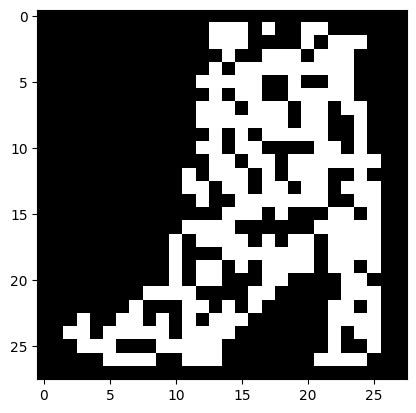

In [ ]:
def bitnot(img1):
  img3 = np.zeros_like(img1)
  for i in range(28):
    for j in range(28):
      img3[i,j]=img1[i,j] > 255/2
  return img3
plt.imshow(bitnot(img1),cmap='gray')

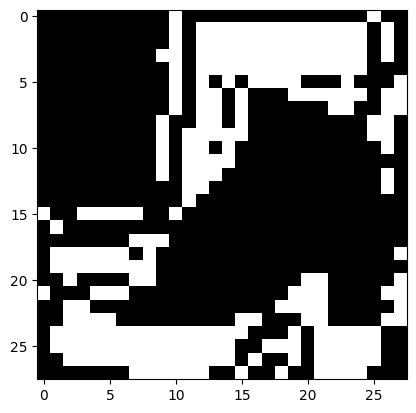

In [ ]:
def bitxor(img1,img2):
  img3 = np.zeros_like(img1)
  for i in range(28):
    for j in range(28):
      img3[i,j]= 1 if bool(img1[i,j]) != bool(img2[i,j]) else 0
  return img3
plt.imshow(bitxor(img1,img2))

- Thresholding
- Gray Level Slicing with and without background


THreshold

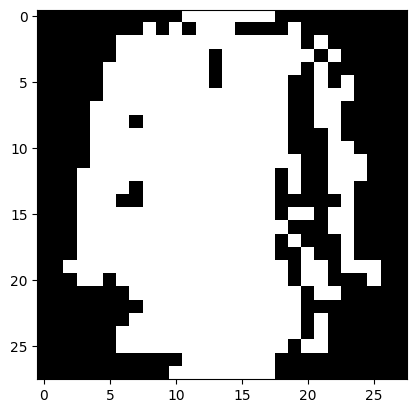

In [ ]:
thres_low= 100
thres_high=200
def threshold(img,low,high):
  img3 = np.zeros_like(img)
  for i in range(28):
    for j in range(28):
      if img[i,j] in range(low+1,high+1):
        img3[i,j]=255
      else:
        img3[i,j]=0
  return img3
plt.imshow(threshold(img1,thres_low,thres_high),cmap='gray')

In [ ]:
def threshold1(img,low,high):
  img3 = np.zeros_like(img)
  for i in range(28):
    for j in range(28):
      if img[i,j] in range(low+1,high+1):
        img3[i,j]=img[i,j]
      else:
        img3[i,j]=0
  return img3

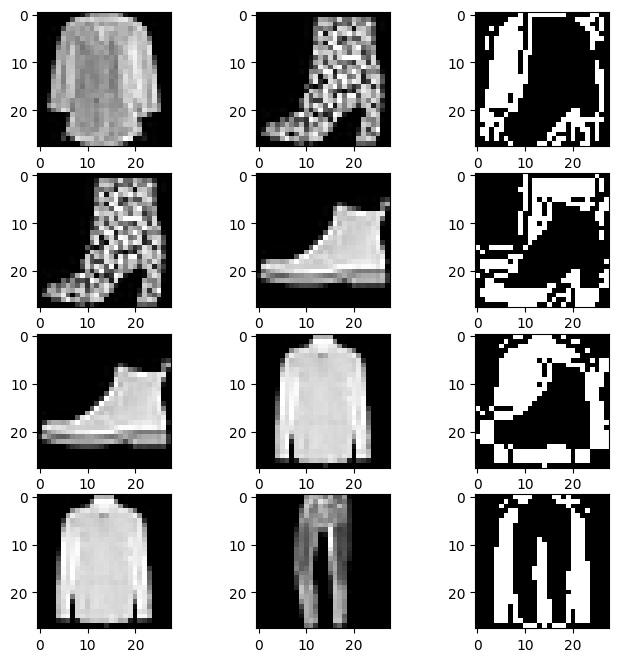

In [ ]:
### Show wit subplots

fig,axes=plt.subplots(4,3,figsize=(8,8))
for i in range(4):
  axes[i,0].imshow(images[i],cmap='gray')
  axes[i,1].imshow(images[i+1],cmap='gray')
  axes[i,2].imshow(bitxor(images[i],images[i+1]),cmap='gray')

### Gray Level Slicing with and without background

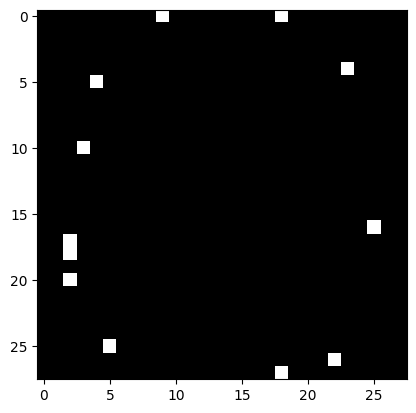

In [ ]:
def gray_lvl_slice(img,low,high,bg=False):
  img3 = np.zeros_like(img)
  for i in range(28):
    for j in range(28):
      if img[i,j] in range(low+1,high+1):
        img3[i,j] = 255
      else:
        img3[i,j] = img[i,j] if bg else 0
  return img3

plt.imshow(gray_lvl_slice(img1,20,50,bg=False),cmap='gray')

In [ ]:
#without bg
#img_glswo=img.copy()
# n=len(img)
# threshold=5
# for i in range(n):
# for j in range(n):
# if img_glswo[i][j]>threshold:
# img_glswo[i][j]=255
# else:
# img_glswo[i][j]=0
# plt.imshow(img_glswo, cmap='Greys_r')
# plt.axis('off')
# plt.show()

#withbg
# img_gls=img.copy()
# n=len(img)
# threshold1=50
# threshold2=200
# for i in range(n):
# for j in range(n):
# if threshold2>img_gls[i][j]>threshold1:
# img_gls[i][j]=img_gls[i][j]
# else:
# img_gls[i][j]=0
# plt.imshow(img_gls, cmap='Greys_r')
# plt.axis('off')
# plt.show()

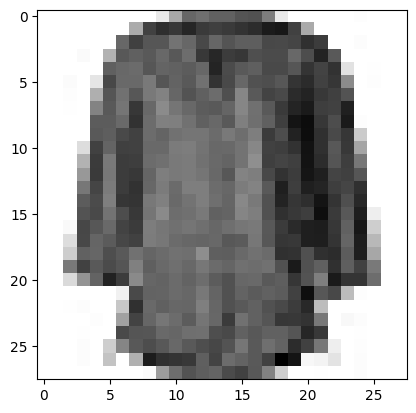

In [ ]:
def img_negative(img):
  img3 = np.zeros_like(img)
  for i in range(28):
    for j in range(28):
      img3[i,j]=img.max()-img[i,j]
  return img3

plt.imshow(img_negative(img1),cmap='gray')

 - Constrast Stretching
 - Log Transform
 - Power Log Transform
 - Contrast stretching with slope

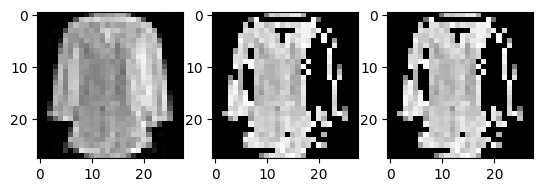

In [ ]:
def contrast_stretching(img):
  img3 = np.zeros_like(img)
  for i in range(28):
    for j in range(28):
      img3[i,j] = (img[i,j]-img.min())/(img.max()-img.min()) *255
  return img3
# plt.imshow(contrast_stretching(img1),cmap='gray')
fig,axes=plt.subplots(1,3)
axes[0].imshow(img1,cmap='gray')
axes[1].imshow(threshold1(img1,80,190))
axes[2].imshow(contrast_stretching(threshold1(img1,80,190)),cmap='gray')

In [ ]:
np.min(contrast_stretching(threshold1(img1,80,190)) == (threshold1(img1,80,190)))

False

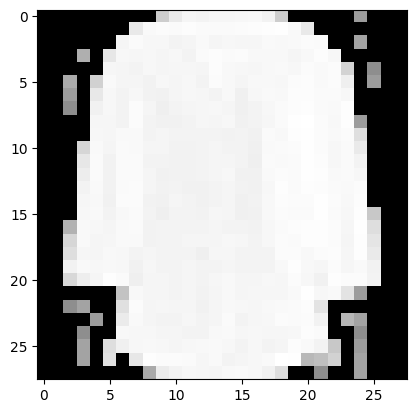

In [ ]:
def log_transformation(img,c=1):
  #handle zeros
  img3 = c*np.log(img+0.001)
  return img3
plt.imshow(log_transformation(img1,c=0.5),cmap='gray')

In [ ]:
def plot2imgs(img1,img2):
  fig,axes=plt.subplots(1,2)
  axes[0].imshow(img1,cmap='gray')
  axes[1].imshow(img2,cmap='gray')
def plot3imgs(img1,img2,img3):
  fig,axes=plt.subplots(1,3)
  axes[0].imshow(img1,cmap='gray')
  axes[1].imshow(img2,cmap='gray')
  axes[2].imshow(img3,cmap='gray')

<ipython-input-190-5f2564fd4a99>:1: RuntimeWarning: divide by zero encountered in log
  plot2imgs(img1,np.log(img1))


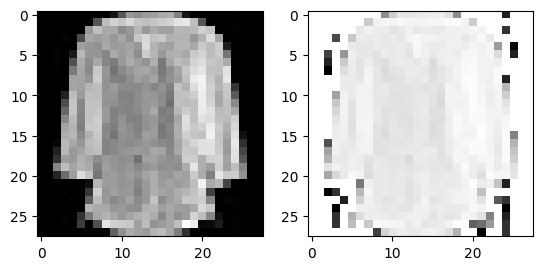

In [ ]:
plot2imgs(img1,np.log(img1))

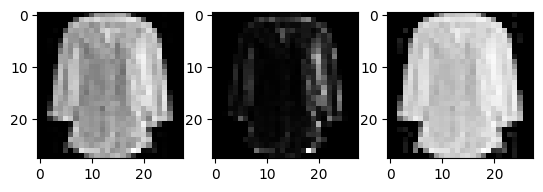

In [ ]:
def power_transformation(img,gamma=0.5):
  img3 = np.power(img,gamma)
  return img3
plot3imgs(img1,contrast_stretching(power_transformation(img1,7)),contrast_stretching(power_transformation(img1)))

In [ ]:
def contrast_str_slope(img,r1,s1,r2,s2):
  img3 = np.zeros_like(img)
  for i in range(28):
    for j in range(28):
      if img[i,j]<r1:
        img3[i,j]=(s1/r1)*img[i,j]
      elif img[i,j]<=r2:
        img3[i,j]=((s2-s1)/(r2-r1))*(img[i,j]-r1)+s1
      else:
        img3[i,j]=((255-s2)/(255-r2))*(img[i,j]-r2)+s2
  return img3
### Limits = ((shigh-slow)/(rhigh-rlow))* (I-rlow) +slow

In [ ]:
def percenti

# Experiment 5

 - Adding Gauss Noise
 - ADding Salt and pepper
 - Averaging Filters
 - Median Filters
 - List of kernels/filters
 - **Convolve**: Base Code for kernels



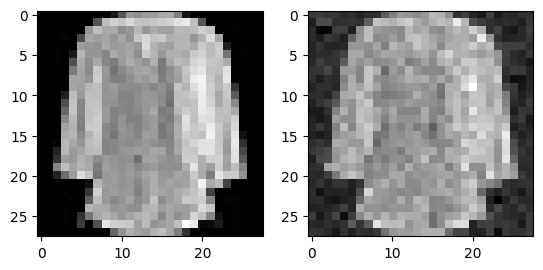

In [ ]:
def add_gauss_noise(img,mean=0,std=20):
  img3 = np.zeros_like(img)
  img3 = img + np.random.normal(mean,std,img.shape)
  return img3
plot2imgs(img1,add_gauss_noise(img1))

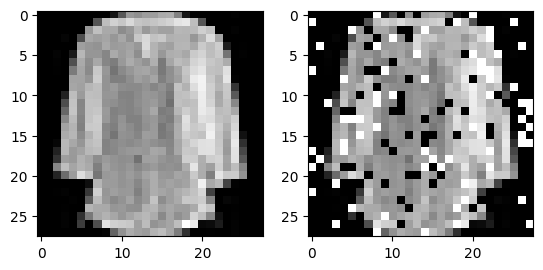

In [ ]:
def add_salt_and_pepper(img, salt_prob, pepper_prob):
  num_pixels = np.prod(img.shape)
  num_salt = salt_prob*num_pixels
  num_pepper = pepper_prob*num_pixels
  img3 = img.copy()
  for i in range(int(num_salt)):
    x = np.random.randint(0, img.shape[0])
    y = np.random.randint(0,img.shape[1])
    img3[x,y] = 255
  for i in range(int(num_pepper)):
    x = np.random.randint(0, img.shape[0])
    y = np.random.randint(0,img.shape[1])
    img3[x,y] = 0
  return img3
plot2imgs(img1,add_salt_and_pepper(img1,0.1,0.1))

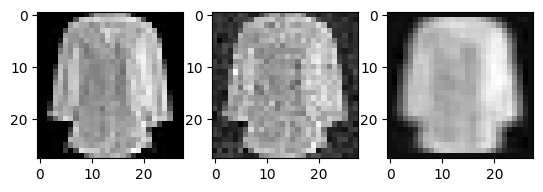

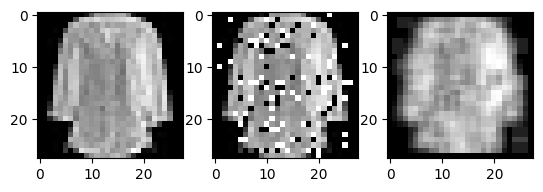

In [ ]:
def avg_filter(img):
  img3 = np.zeros_like(img)
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
      img3[i,j] = np.mean(img[i-1:i+2,j-1:j+2])
  return img3
plot3imgs(img1,add_gauss_noise(img1),avg_filter(add_gauss_noise(img1)))
snp_nois_im=add_salt_and_pepper(img1,0.1,0.1)
plot3imgs(img1,snp_nois_im,avg_filter(snp_nois_im))

In [ ]:
def median_filter(img):
  img3 = np.zeros_like(img)
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
      img3[i,j] = np.median(img[i-1:i+2,j-1:j+2])
  return img3

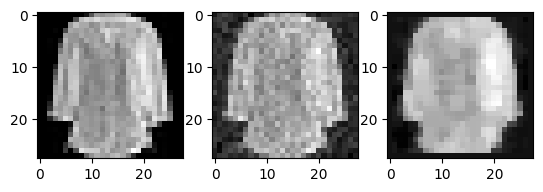

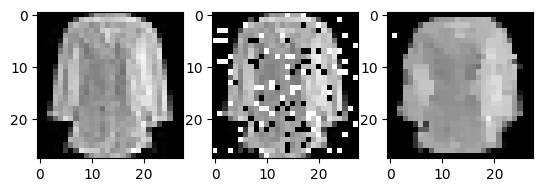

In [ ]:
plot3imgs(img1,add_gauss_noise(img1),median_filter(add_gauss_noise(img1)))
snp_nois_im=add_salt_and_pepper(img1,0.1,0.1)
plot3imgs(img1,snp_nois_im,median_filter(snp_nois_im))

Kernel

In [ ]:
gauss_filter=np.array(
    [
     [1,2,1],
     [2,4,2],
     [1,2,1]

    ]

          )/16

sobel_filter=np.array(
    [
     [1,0,-1],
     [2,0,-2],
     [1,0,-1]

    ]

          )

laplacian_filter=np.array(
    [
     [0,1,0],
     [1,-4,1],
     [0,1,0]

    ]

          )
sharpen_filter=np.array(
    [
     [0,-1,0],
     [-1,5,-1],
     [0,-1,0]

    ]

          )
edge_filter=np.array(
    [
     [-1,-1,-1],
     [-1,8,-1],
     [-1,-1,-1]

    ]

          )

filters=[gauss_filter,sobel_filter,laplacian_filter,sharpen_filter,edge_filter]


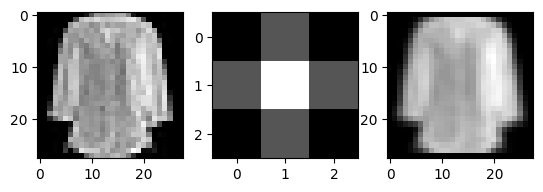

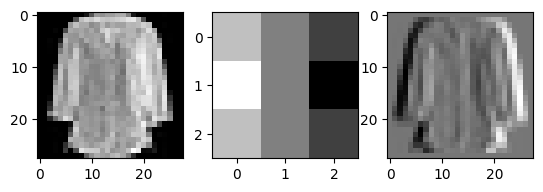

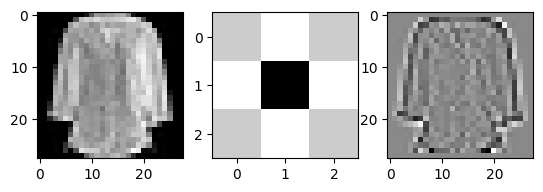

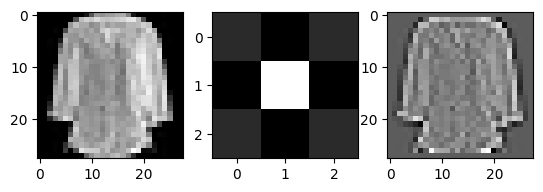

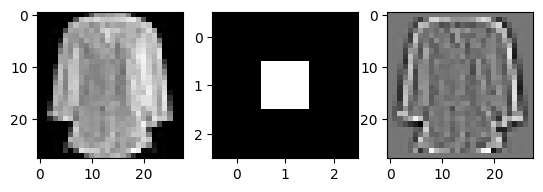

In [ ]:
def convolve(img,kernel):
  img3 = np.zeros_like(img)
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
      img3[i,j] = np.sum(img[i-1:i+2,j-1:j+2]*kernel)
  return img3
# plt.imshow(convolve(img1,np.ones((3,3))),cmap='gray')
for kernel in filters:
  plot3imgs(img1,kernel,convolve(img1,kernel))

In [ ]:
#random 10 images
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to apply convolution
def convolve(img, kernel):
    img3 = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            img3[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)
    return img3

# Function to plot three images side by side
def plot3imgs(img1, kernel, img3):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(img1, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Kernel")
    plt.imshow(kernel, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Filtered Image")
    plt.imshow(img3, cmap='gray')
    plt.axis('off')
    plt.show()



# Randomly sample 10 rows
sampled_data = df.sample(10, random_state=42)

# Define filters
filters = [
    np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]),  # Edge detection
    np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),  # Laplacian filter
    np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),  # Sobel filter (horizontal)
]

# Process each sampled image
for index, row in sampled_data.iterrows():
    # Extract label and pixels
    label = row[0]  # Assuming the first column is the label
    pixels = row[1:].values.reshape(28, 28)  # Assuming 28x28 image size

    print(f"Applying filters to image with label: {label}")
    for kernel in filters:
        filtered_img = convolve(pixels, kernel)
        plot3imgs(pixels, kernel, filtered_img)

In [ ]:
gauss_filter=np.array(
    [
     [1,2,1],
     [2,4,2],
     [1,2,1]

    ]

          )/16

sobel_filter=np.array(
    [
     [1,0,-1],
     [2,0,-2],
     [1,0,-1]

    ]

          )

laplacian_filter=np.array(
    [
     [0,1,0],
     [1,-4,1],
     [0,1,0]

    ]

          )
sharpen_filter=np.array(
    [
     [0,-1,0],
     [-1,5,-1],
     [0,-1,0]

    ]

          )
edge_filter=np.array(
    [
     [-1,-1,-1],
     [-1,8,-1],
     [-1,-1,-1]

    ]

          )

filters=[gauss_filter,sobel_filter,laplacian_filter,sharpen_filter,edge_filter]


plot_images([img1]+[convolve(img1,kernel) for kernel in filters])
for kernel in filters:
  plot_images([img1,kernel,convolve(img1,kernel)])

- Histogram Equalization
- Histogram stretching

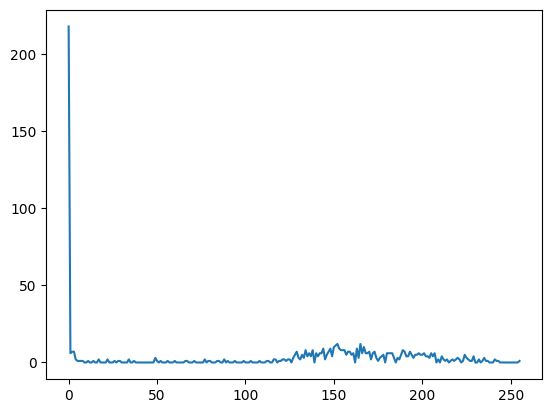

In [ ]:
def get_pixel_frequency(img):
  freq=np.zeros(256)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      freq[img[i,j]]+=1
  return freq
plt.plot(get_pixel_frequency(img1))

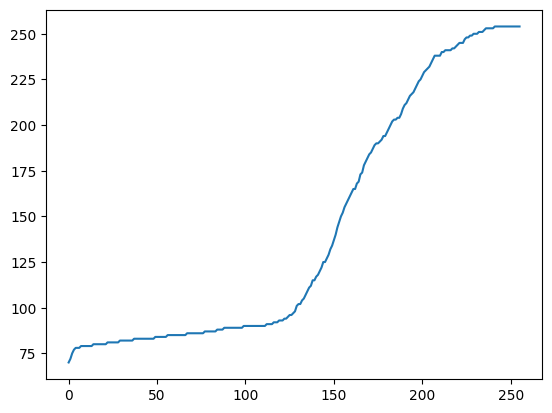

In [ ]:
def get_px_map(img):
  freq=get_pixel_frequency(img)
  px_pdf= freq/np.sum(freq)
  px_cdf = np.cumsum(px_pdf)
  bits_cumsum = img.max()*px_cdf
  px_map = np.fix(bits_cumsum)
  return px_map

plt.plot(get_px_map(img1))

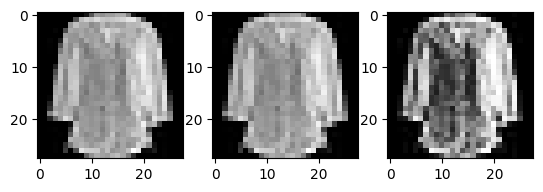

In [ ]:
def hist_eq(img):
  img3 = np.zeros_like(img)
  px_map=get_px_map(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img3[i,j] = px_map[img[i,j]]
  return img3
plot3imgs(img1,contrast_stretching(img1),hist_eq(img1))

In [ ]:
def histograme_matching(img1,img2):
  img3=np.zeros_like(img1)
  pxl_map1=get_pxl_map(img2)

  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      img3[i,j]=pxl_map1[img1[i,j]]
  return img3
plot_images([img1,img2,histograme_matching(img1,img2)])

# Experiment 6

 - High Pass Filtering
 - Low Pass Filtering
 - High Boost Filtering

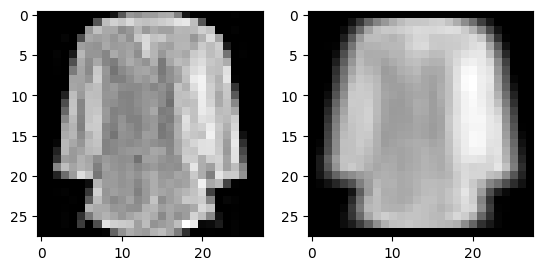

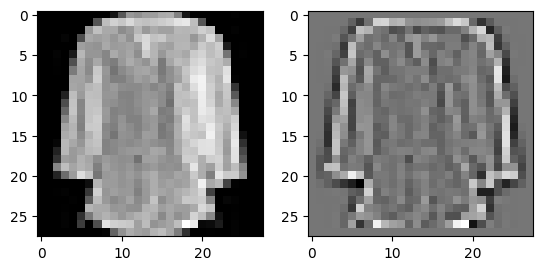

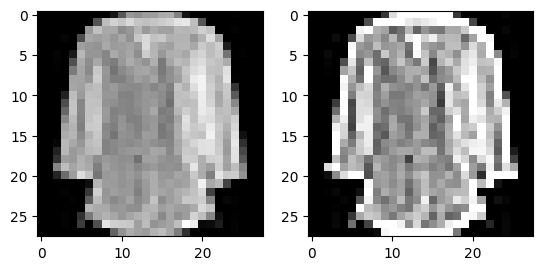

In [ ]:
lowPassKernel = np.array([
    [1,1,1],[1,1,1],[1,1,1]
])/9

highPassKernel = np.array([
    [-1,-1,-1],[-1,8,-1],[-1,-1,-1]
])


def high_boost(img,alpha):
  img3 = np.zeros_like(img)
  lowPassedImage = convolve(img,lowPassKernel)

  img3 = img + alpha*(img-lowPassedImage)
  return np.clip(img3,0,255).astype(int)



plot2imgs(img1,convolve(img1,lowPassKernel))
plot2imgs(img1,convolve(img1,highPassKernel))
plot2imgs(img1,high_boost(img1,1.5))

#Experiment 7

 - Logic for running structuring element
 - erosion
 - dilation
 - opening
 - closing
 - hit_or_miss

In [ ]:
def convolve_se(img,se):
  # Create a padded image
  img_pad = np.pad(img,1,mode='constant',constant_values=0)
  # Replicate
  img3 = np.zeros_like(img)

  # Double for loop (from 1 to imageshape+1)
  for i in range(1,img.shape[0]+1):
    for j in range(1,img.shape[1]+1):
      score= np.sum(img_pad[i-1:i+2,j-1:j+2]*se)  # Dot product of SE with region

      ## If dot product ==  num of 1s in SE Fit
      if score >= se.sum():
        img3[i-1,j-1]=255

      ## If none match then miss
      elif score ==0:

        img3[i-1,j-1]=0

      ## ELse HIt (dot product between 0 and number of 1s )
      else:
        img3[i-1,j-1]=127

  return img3

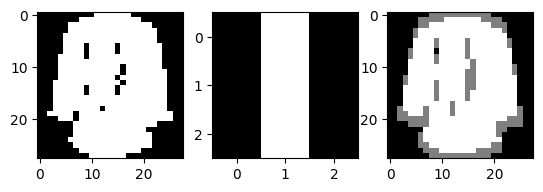

In [ ]:
SE=np.array([
    [0,1,0],
    [0,1,0],
    [0,1,0]
])

# SE =

img_bin=threshold(img1,127,256)

#replace 255 with 1
img_bin[img_bin>0]=1

plot3imgs(img_bin,SE,convolve_se(img_bin,SE))

In [ ]:
convolve_se(img_bin,SE).max()

255

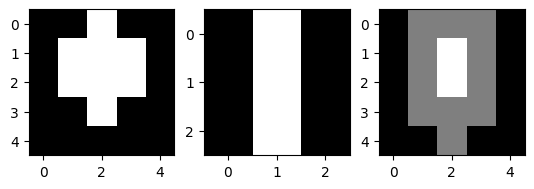

In [ ]:
img_morph=np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]
])



se=np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

plot3imgs(img_morph,SE,convolve_se(img_morph,SE))

In [ ]:
#Erosion

In [ ]:
def erosion(img, se):
  img3 = np.zeros_like(img)
  img_temp=convolve_se(img,se)    ### Convolve
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img3[i,j] = 1 if img_temp[i,j] == 255  else 0  ## Allow only 255
  return img3

def dilation(img, se):
  img3 = np.zeros_like(img)
  img_temp=convolve_se(img,se)    ### Convolve
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img3[i,j] = 1 if img_temp[i,j] >0   else 0 ## Allow above 127
  return img3



In [ ]:
def opening(img,se):
  #o-e-d
  return dilation(erosion(img,se),se)

def closing(img,se):
  #c-d-e
  return erosion(dilation(img,se),se)
def reverse_se(se):
  return np.abs(se-np.ones_like(se) )

def hitOrMiss(img,se):
  img3 = np.zeros_like(img)

  img_temp=erosion(img,se)    ### Convolve
  nimg_temp = erosion(img,reverse_se(se))
  img3 = img_temp & nimg_temp
  return img3

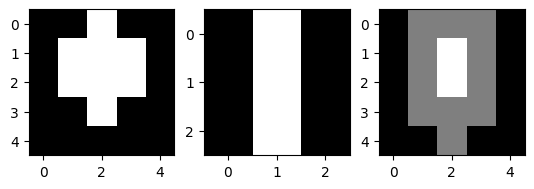

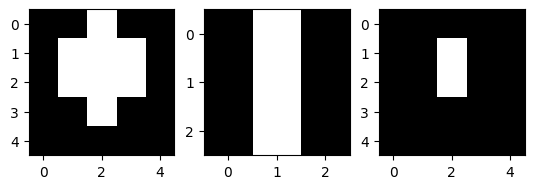

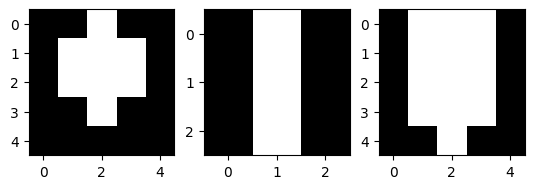

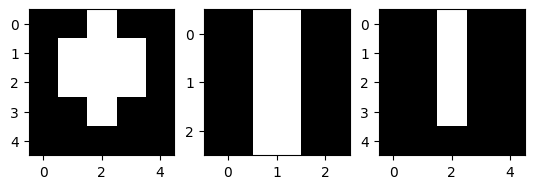

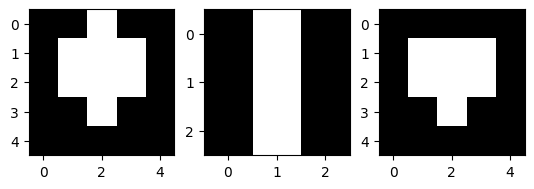

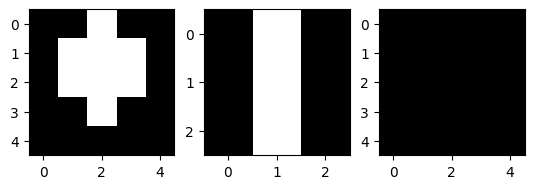

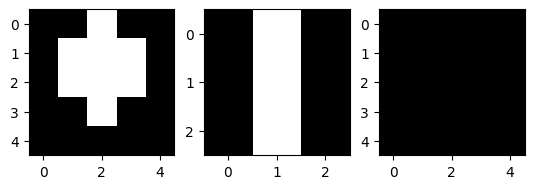

In [ ]:
plot3imgs(img_morph,SE,convolve_se(img_morph,SE))
plot3imgs(img_morph,SE,erosion(img_morph,SE))
plot3imgs(img_morph,SE,dilation(img_morph,SE))
plot3imgs(img_morph,SE,opening(img_morph,SE))
plot3imgs(img_morph,SE,closing(img_morph,SE))
plot3imgs(img_morph,SE,hitOrMiss(img_morph,SE))
plot3imgs(img_morph,SE,erosion(img_morph,reverse_se(SE)))

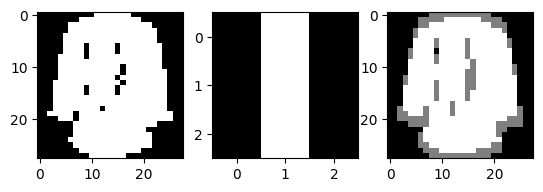

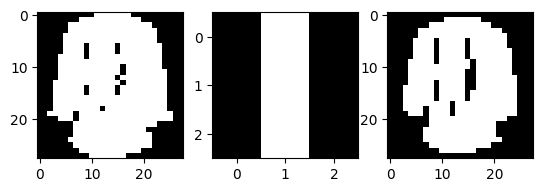

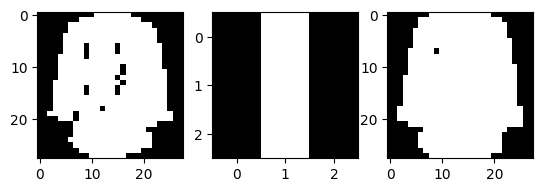

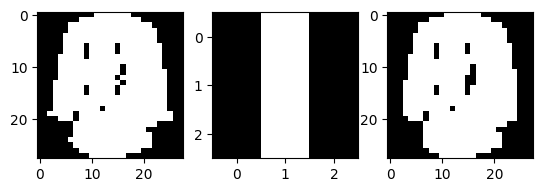

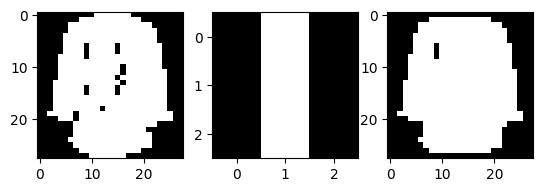

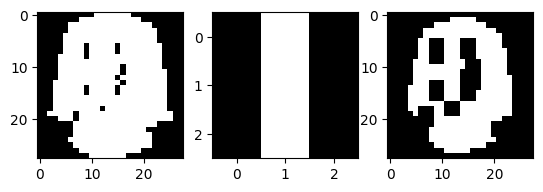

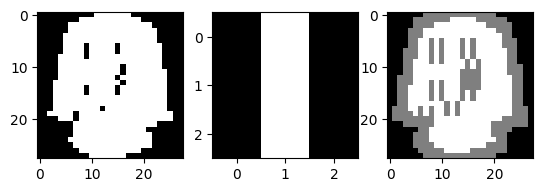

In [ ]:
plot3imgs(img_bin,SE,convolve_se(img_bin,SE))
plot3imgs(img_bin,SE,erosion(img_bin,SE))
plot3imgs(img_bin,SE,dilation(img_bin,SE))
plot3imgs(img_bin,SE,opening(img_bin,SE))
plot3imgs(img_bin,SE,closing(img_bin,SE))
plot3imgs(img_bin,SE,hitOrMiss(img_bin,SE))
plot3imgs(img_bin,SE,convolve_se(img_bin,reverse_se(SE)))

# Experiment 8  - Incomplete

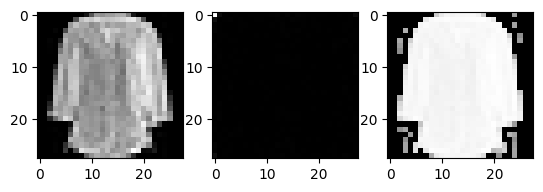

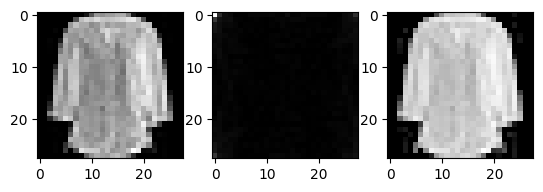

In [ ]:
def fourier_trans(img):
  return np.fft.fft2(img)

def inv_fourier_trans(img):
  return np.fft.ifft2(img)

def run_func_in_freq_domain(img,func):

  return np.abs(inv_fourier_trans(np.fft.ifftshift(   func(    np.abs(np.fft.fftshift(fourier_trans(img))))           )))




plot3imgs(img1,run_func_in_freq_domain(img1,log_transformation),log_transformation(img1))
plot3imgs(img1,run_func_in_freq_domain(img1,power_transformation),power_transformation(img1))

#Experiment 9

Region based segmentation
 - region growing
 - region splitting and merging

In [ ]:
#fft
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(img):

    f_transform = np.fft.fft2(img)  # 2D Fourier Transform
    f_shift = np.fft.fftshift(f_transform)  # Shift low frequencies to the center
    return f_shift

def inverse_fourier_transform(f_transform):
    f_ishift = np.fft.ifftshift(f_transform)  # Shift frequencies back
    img_reconstructed = np.abs(np.fft.ifft2(f_ishift))  # Inverse 2D Fourier Transform
    return img_reconstructed

def gaussian_filter(shape, sigma, high_pass=False):
    h, w = shape
    y, x = np.meshgrid(np.linspace(-h//2, h//2, h), np.linspace(-w//2, w//2, w), indexing="ij")
    d2 = x**2 + y**2
    gaussian = np.exp(-d2 / (2 * sigma**2))
    if high_pass:
        return 1 - gaussian
    return gaussian

def apply_filter_in_freq_domain(img, filter_function, **filter_params):

    f_transform = fourier_transform(img)

    filter_mask = filter_function(img.shape, **filter_params)

    filtered_transform = f_transform * filter_mask

    return inverse_fourier_transform(filtered_transform), filter_mask




filtered_low, low_pass_filter = apply_filter_in_freq_domain(img1, gaussian_filter, sigma=20, high_pass=False)

filtered_high, high_pass_filter = apply_filter_in_freq_domain(img1, gaussian_filter, sigma=20, high_pass=True)

plot_images(
    [img1, low_pass_filter, filtered_low, high_pass_filter, filtered_high],
)


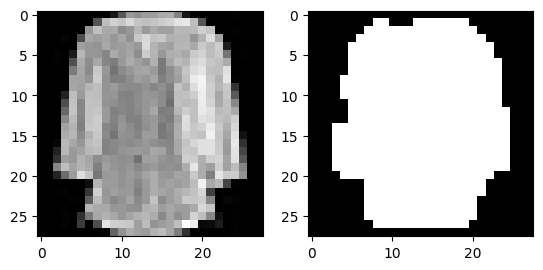

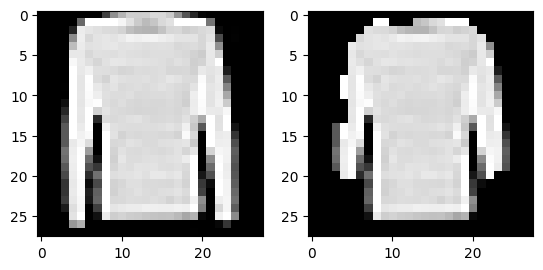

In [ ]:
from queue import Queue


def my_region_growing(img,seed_point,threshold):
  img3=np.zeros_like(img)
  queue=Queue()
  visited=np.zeros_like(img)
  queue.put(seed_point)
  visited[seed_point]=1
  img3[seed_point]=255
  neighbours=[

              (-1,0),(1,0),(0,1),(0,-1),(-1,-1),(1,1),(-1,1),(1,-1)
  ]




  while not queue.empty():

    pxl=queue.get()
    # print(pxl)
    i,j=pxl
    for dx,dy in neighbours:
      if i+dx in range(img.shape[0]) and j+dy in range(img.shape[1]):
        if np.abs(img[i+dx,j+dy]-img[i,j])<=threshold and visited[i+dx,j+dy]==0:

          visited[i+dx,j+dy]=1
          img3[i+dx,j+dy]=255
          queue.put((i+dx,j+dy))
  return img3

seg_img=my_region_growing(median_filter(img1),(15,12),12)

plot2imgs(img1,seg_img)




plot2imgs(images[120],np.minimum(seg_img,images[120]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue

def region_growing(img, seed_points, threshold):

    rows,cols = img.shape
    segmented_img = np.zeros((rows,cols), dtype=np.uint8)
    queue = Queue()
    visited=np.zeros((rows,cols), dtype=np.uint8)
    for seedpt in seed_points:
        queue.put(seedpt)
        segmented_img[seedpt] = 255
        visited[seedpt] = 1
    while not queue.empty():
        current_pixel = queue.get()
        i,j = current_pixel
        for x,y in [(i-1,j), (i+1,j), (i,j-1), (i,j+1)]:
          if x in range(rows) and y in range(cols):
            if np.abs(img[i,j]-img[x,y]) <= threshold and visited[x,y]==0:
              queue.put((x,y))
              segmented_img[x,y] = 255
              visited[x,y] = 1
    return segmented_img


# Define seed point and intensity threshold
seed_points = [(12, 12),(13,10)]  # Seed pixel in the region of interest
threshold = 20       # Intensity similarity threshold

# Perform region growing segmentation
segmented_img = region_growing(img, seed_points, threshold)



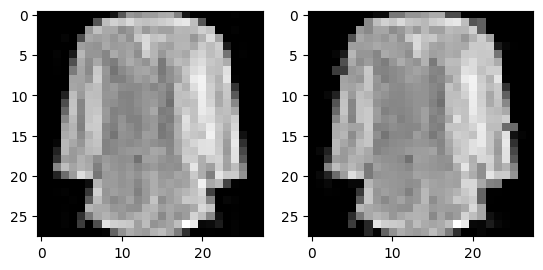

In [ ]:
def split_and_merge(img, threshold):

    rows, cols = img.shape

    segmented = np.zeros_like(img, dtype=np.uint8)

    def split(region, x, y, width, height):
        sub_region = region[y:y+height, x:x+width]

        variance = np.var(sub_region)
        if variance < threshold or width <= 1 or height <= 1:
            # Mark the region as homogeneous
            mean_value = np.mean(sub_region)
            segmented[y:y+height, x:x+width] = mean_value
            return

        # Split the region into four quadrants
        half_width = width // 2
        half_height = height // 2
        split(region, x, y, half_width, half_height)                # Top-left
        split(region, x + half_width, y, width - half_width, half_height)  # Top-right
        split(region, x, y + half_height, half_width, height - half_height)  # Bottom-left
        split(region, x + half_width, y + half_height, width - half_width, height - half_height)  # Bottom-right

    # Merge adjacent homogeneous regions
    def merge():
        """
        Merge adjacent regions if they satisfy the homogeneity condition.
        """
        for y in range(1, rows - 1):
            for x in range(1, cols - 1):
                # Check neighbors for merging
                neighbors = [
                    segmented[y-1, x], segmented[y+1, x],
                    segmented[y, x-1], segmented[y, x+1]
                ]
                mean_neighbors = np.mean(neighbors)
                if np.abs(segmented[y, x] - mean_neighbors) < threshold:
                    segmented[y, x] = mean_neighbors

    # Perform the initial splitting
    split(img, 0, 0, cols, rows)

    # Perform merging
    merge()

    return segmented


plot2imgs(img1,split_and_merge(img1,10))

In [ ]:
def region_split_merge(img, intensity_threshold):
    def recursive_divide_merge(sub):
        h, w = sub.shape
        if h<=2 or w<=2:
            return sub
        if np.max(sub) - np.min(sub) <= intensity_threshold:
            return np.full(sub.shape, 128, dtype=np.uint8)
        mid_h, mid_w = h//2, w//2
        top_left_part = recursive_divide_merge(sub[:mid_h, :mid_w])
        top_right_part = recursive_divide_merge(sub[:mid_h, mid_w:])
        bottom_left_part = recursive_divide_merge(sub[mid_h:, :mid_w])
        bottom_right_part = recursive_divide_merge(sub[mid_h:, mid_w:])
        return np.vstack(
            (np.hstack((top_left_part, top_right_part)),
            np.hstack((bottom_left_part, bottom_right_part))),
        )
    return recursive_divide_merge(img)
threshold = 25
merged_img = region_split_merge(img_array1, threshold)
display_2_images(img_array1, merged_img)

In [ ]:
def quadtree_split_merge(img, threshold):

    rows, cols = img.shape
    segmentation = np.zeros_like(img, dtype=np.uint8)  # Segmentation mask
    label = 1  # Region label counter

    # Define the predicate Q(R)
    def is_homogeneous(region):
        return np.var(region) < threshold

    # Recursive splitting function
    def split(region, x, y, width, height):
        nonlocal label
        sub_region = region[y:y + height, x:x + width]

        # Check if the region satisfies homogeneity
        if is_homogeneous(sub_region) or width <= 1 or height <= 1:
            segmentation[y:y + height, x:x + width] = label
            label += 1
            return

        # Split into four quadrants
        half_width = width // 2
        half_height = height // 2
        split(region, x, y, half_width, half_height)  # Top-left
        split(region, x + half_width, y, width - half_width, half_height)  # Top-right
        split(region, x, y + half_height, half_width, height - half_height)  # Bottom-left
        split(region, x + half_width, y + half_height, width - half_width, height - half_height)  # Bottom-right

    # Splitting
    split(img, 0, 0, cols, rows)

    # Merging function
    def merge():

        for y in range(1, rows - 1):
            for x in range(1, cols - 1):
                neighbors = [
                    segmentation[y - 1, x], segmentation[y + 1, x],
                    segmentation[y, x - 1], segmentation[y, x + 1]
                ]
                current_label = segmentation[y, x]
                mean_neighbors = np.mean([img[segmentation == n] for n in neighbors if n != current_label])
                if np.abs(img[segmentation == current_label] - mean_neighbors) < threshold:
                    segmentation[segmentation == current_label] = np.mean(neighbors)

    merge()
    return segmentation

In [ ]:
img1,quadtree_split_merge(img1,10)

<ipython-input-423-72c3c6abeb3a>:18: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  segmentation[y:y + height, x:x + width] = label
<ipython-input-423-72c3c6abeb3a>:18: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  segmentation[y:y + height, x:x + width] = label
<ipython-input-423-72c3c6abeb3a>:18: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def butterworth_filter(shape, cutoff, order, filter_type='low'):
    """
    Generate a Butterworth filter.

    :param shape: Tuple (height, width) of the filter
    :param cutoff: Cutoff frequency (D0)
    :param order: Order of the filter (n)
    :param filter_type: Type of filter ('low' or 'high')
    :return: Butterworth filter as a 2D array
    """
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2

    # Create a grid of distances
    x = np.arange(cols)
    y = np.arange(rows)
    X, Y = np.meshgrid(x - center_col, y - center_row)
    distance = np.sqrt(X**2 + Y**2)

    # Butterworth filter equation
    if filter_type == 'low':
        filter_array = 1 / (1 + (distance / cutoff)**(2 * order))
    elif filter_type == 'high':
        filter_array = 1 / (1 + (cutoff / distance)**(2 * order))
        filter_array[center_row, center_col] = 0  # Avoid division by zero at the center
    else:
        raise ValueError("filter_type must be 'low' or 'high'")

    return filter_array

def apply_filter(img, filter_array):
    """
    Apply a filter to an image in the frequency domain.

    :param img: Input image as a 2D array
    :param filter_array: Filter in the frequency domain
    :return: Filtered image
    """
    # Perform Fourier Transform
    fft_img = np.fft.fft2(img)
    fft_img_shifted = np.fft.fftshift(fft_img)

    # Apply the filter
    filtered_fft = fft_img_shifted * filter_array

    # Perform Inverse Fourier Transform
    filtered_fft_shifted = np.fft.ifftshift(filtered_fft)
    filtered_img = np.fft.ifft2(filtered_fft_shifted)

    # Take the real part of the inverse FFT
    filtered_img = np.abs(filtered_img)
    return filtered_img

# Example usage
if __name__ == "__main__":
    # Load an image as grayscale using PIL
    img = Image.open('your_image.jpg').convert('L')
    img_array = np.array(img)

    # Generate a Butterworth low-pass filter
    shape = img_array.shape
    cutoff = 30  # Adjust the cutoff frequency
    order = 2    # Adjust the order
    butterworth_low = butterworth_filter(shape, cutoff, order, 'low')

    # Apply the Butterworth filter
    filtered_img = apply_filter(img_array, butterworth_low)

    # Display results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img_array, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(butterworth_low, cmap='gray')
    axs[1].set_title('Butterworth Low-Pass Filter')
    axs[1].axis('off')

    axs[2].imshow(filtered_img, cmap='gray')
    axs[2].set_title('Filtered Image')
    axs[2].axis('off')

    plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import fashion_mnist
# from scipy.ndimage import binary_erosion, binary_dilation

# # Binary Addition
# def binary_addition(img, img1):
#     """Performs binary addition with carry handled."""
#     result = img + img1  # Add images
#     result[result > 1] = 1  # Ensure binary values (clipping to 1)
#     return result

# # Binary Erosion
# def binary_erosion_operation(binary_img, structure=None):
#     """
#     Performs erosion on a binary image.
#     :param binary_img: Input binary image
#     :param structure: Structuring element (default: 3x3 square)
#     """
#     if structure is None:
#         structure = np.ones((3, 3))  # Default 3x3 square structuring element
#     eroded = binary_erosion(binary_img, structure=structure)
#     return eroded

# # Binary Dilation
# def binary_dilation_operation(binary_img, structure=None):
#     """
#     Performs dilation on a binary image.
#     :param binary_img: Input binary image
#     :param structure: Structuring element (default: 3x3 square)
#     """
#     if structure is None:
#         structure = np.ones((3, 3))  # Default 3x3 square structuring element
#     dilated = binary_dilation(binary_img, structure=structure)
#     return dilated

# # Load Fashion MNIST Dataset
# def load_and_preprocess_data():
#     (x_train, y_train), (_, _) = fashion_mnist.load_data()
#     # Select two images from the dataset
#     img = x_train[0]  # Image 1 (grayscale)
#     img1 = x_train[1]  # Image 2 (grayscale)

#     # Binarize the images (thresholding)
#     img = (img > 128).astype(int)  # Convert to binary
#     img1 = (img1 > 128).astype(int)  # Convert to binary

#     return img, img1

# # Main execution
# if __name__ == "__main__":
#     # Load and preprocess images
#     img, img1 = load_and_preprocess_data()

#     # Perform binary addition
#     added_image = binary_addition(img, img1)

#     # Perform erosion and dilation on the added image
#     eroded_image = binary_erosion_operation(added_image)
#     dilated_image = binary_dilation_operation(added_image)

#     # Display results
#     fig, axs = plt.subplots(1, 4, figsize=(15, 5))
#     axs[0].imshow(img, cmap='gray')
#     axs[0].set_title('Image 1')
#     axs[0].axis('off')

#     axs[1].imshow(img1, cmap='gray')
#     axs[1].set_title('Image 2')
#     axs[1].axis('off')

#     axs[2].imshow(eroded_image, cmap='gray')
#     axs[2].set_title('Eroded (After Addition)')
#     axs[2].axis('off')

#     axs[3].imshow(dilated_image, cmap='gray')
#     axs[3].set_title('Dilated (After Addition)')
#     axs[3].axis('off')

#     plt.show()


# Experiment 10